In [26]:
import pandas
import numpy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Markdown
from sklearn.utils import check_random_state
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

**Importing and formatting the heart dataset**\
- The dataset is imported and split into a features and target subset.
- the features and target subsets are then split into train and test data

In [27]:
data = pandas.read_excel('heart.xlsx', "heart")
# print(data.dtypes)
feature_names = data.columns.values.tolist()
feature_names.remove('target')
target = data["target"]
features = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)



**Decision Tree Classifier Model**\
- Running the decision tree classifier for a range of tree depth values from 1 to 25
- Plotting the training and testing accuracy for both "gini index" and "entropy" computations

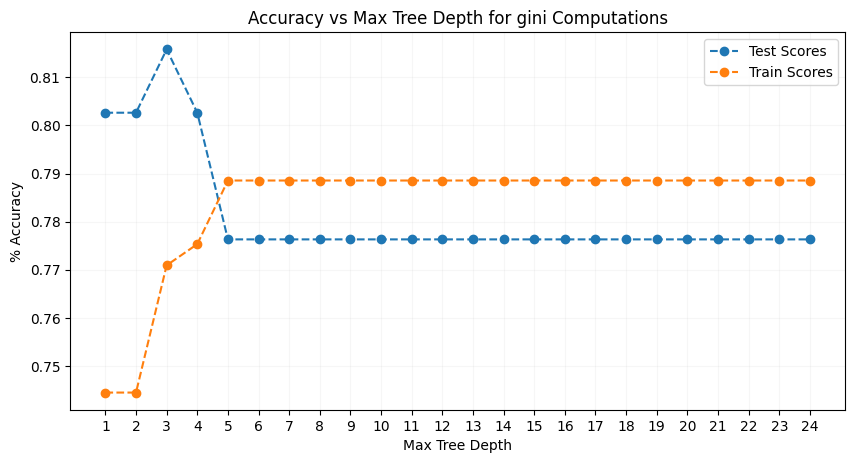

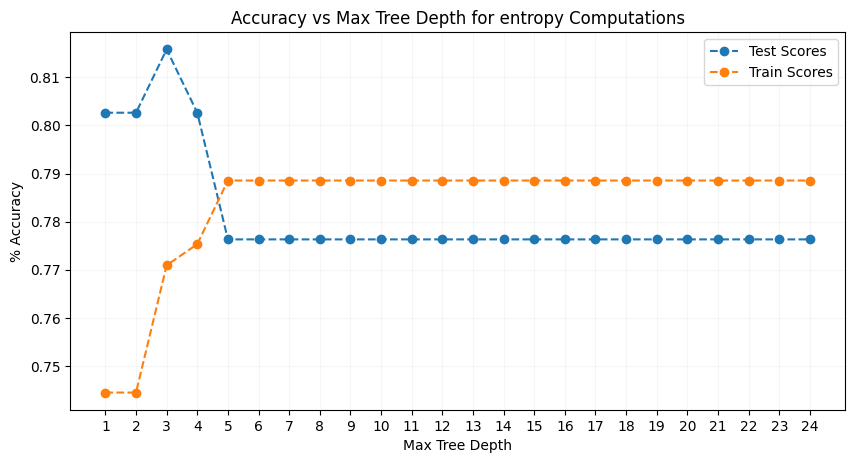

In [28]:

maxDepth = [i for i in range(1, 25)]
computations = ["gini", "entropy"]
for computation_type in computations:
    accuracy_score_train = []
    accuracy_score_test = []
    for depth in maxDepth:
        tree_classifier = DecisionTreeClassifier(max_depth=depth, criterion=computation_type)
        tree_classifier.fit(X_train, y_train)
        accuracy_score_train.append(tree_classifier.score(X_train, y_train))
        accuracy_score_test.append(tree_classifier.score(X_test, y_test))
        predictions = tree_classifier.predict(X_test)
    plt.figure(figsize=(10,5), dpi=100)
    plt.xticks(maxDepth)
    plt.plot(maxDepth, accuracy_score_test, 'o--', label="Test Scores")
    plt.plot(maxDepth, accuracy_score_train, 'o--', label="Train Scores")
    plt.legend()
    plt.title('Accuracy vs Max Tree Depth for %s Computations' % (computation_type))
    plt.xlabel('Max Tree Depth')
    plt.ylabel('% Accuracy')
    plt.grid(alpha=0.1)
    plt.show()

We can see from the above plots that the accuracies for both Gini index computations and entropy computations are very similar as the Max Tree depth increases. When the depth of the tree is 5, the Training error is minimized. When the dept of the tree is 5, the testing error is maximized. In order to get a better training and test accuracy, the best Max Depth in this data set is 4. This depth will be used for the following comparisons. 

**Plotting Decision Tree**
- Decision tree plotted for the gini index computation
- Confusion matrix plotted for the gini index computation

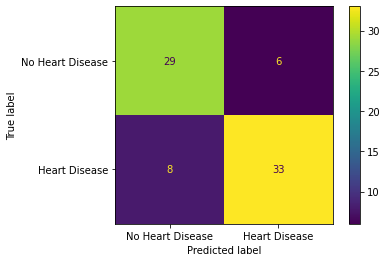

In [29]:
tree_classifier_gini = DecisionTreeClassifier(max_depth=4, criterion="gini")
tree_classifier_gini.fit(X_train, y_train)
predictions_gini = tree_classifier_gini.predict(X_test)
plt.figure(figsize=(35,10), dpi=200)
plot_tree(tree_classifier_gini, feature_names=feature_names, class_names=['No Heart Disease', 'Heart Disease'], 
            filled=True, impurity=True, rounded=True, fontsize=20)

c_matrix = confusion_matrix(y_test, predictions_gini, labels=[0,1])
cm = ConfusionMatrixDisplay(c_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
cm.plot()


**Plotting Decision Tree**
- Decision tree plotted for the entropy computation
- Confusion matrix plotted for the entropy computation

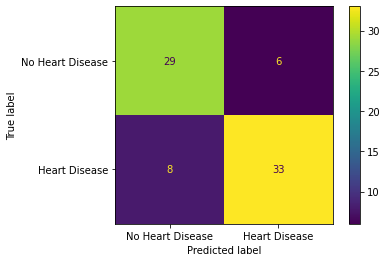

In [30]:
tree_classifier_entropy = DecisionTreeClassifier(max_depth=4, criterion="entropy")
tree_classifier_entropy.fit(X_train, y_train)
predictions_entropy = tree_classifier_entropy.predict(X_test)
plt.figure(figsize=(35,10), dpi=200)
plot_tree(tree_classifier_entropy, feature_names=feature_names, class_names=['No Heart Disease', 'Heart Disease'], 
            filled=True, impurity=True, rounded=True, fontsize=20)

c_matrix = confusion_matrix(y_test, predictions_entropy, labels=[0,1])
cm = ConfusionMatrixDisplay(c_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
cm.plot()